### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Spring 2018 ###

# Feed To Others What You Would Eat Yourself: Creating Affordable and Interesting Menus for All Americans #

#### Anne Ulrich (aulrich3@wisc.edu) and Harish Veeramani (hveeramani@wisc.edu)

*****

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Mathematical Model](#2.-Mathematical-model)
1. [Solution](#3.-Solution)
1. [Results and Discussion](#4.-Results-and-discussion)
  1. [Optional Subsection](#4.A.-Feel-free-to-add-subsections)
1. [Conclusion](#5.-Conclusion)

## 1. Introduction ##

Here in America, commentators have long noted the structural factors creating permanent communities of underprivileged citizens. In recent years, we’ve seen a particular focus on lack of access to critical health care and prevention resources, with legislative actions and nonprofit initiatives ranging from the Affordable Care Act to Michelle Obama’s Let’s Move! campaign to reduce childhood obesity. One emerging area of investigation revolves around communities’ access to a variety high-quality, healthy foods. In our project, we aim to quantify these access issues by consider the optimal diets that can be constructed from the selection available at a variety of local different stores. 

In constructing our project, we realized that access to healthy nutritional foods depends on a variety of issues. How far away is the grocery store from your house? Do you even have a way of getting to the nearest grocery store? How can you construct a varied diet from the food available to you? Is it better to shop at more than one store given the variation in cost between stores? We sought to answer these questions by improving on a well-known study from economic literature: the Stigler diet.

George Stigler was an economist at Columbia University and the University of Chicago who revolutionized his field by quantitatively analyzing the impact of government economic regulations (previous economists’ analysis had focused on qualitative effects and theory). [1] In 1945, Stigler gathered data on a basic list of foods, nutrients, and prices, then played with the numbers to quantify the cheapest possible diet on the market. His work would inspire George Dantzig to develop the Simplex Algorithm just a few years later, one of the most efficient algorithms available today for solving general problems with linear constraint and objective functions. [2]

Stigler’s diet provided a very good baseline for understanding the price associated with a barebones minimalist diet. However, he didn’t take into account that food has to be bought in unit quantities (he considered only how many nutrients were contained in one dollar’s worth of flour, for instance) and he didn’t consider several additional constraints, like travel time and expense, differing food price/availability by store, and age and gender concerns. In our project, we sought to address both of these issues to provide a more complete picture of modern Americans’ access to good, nutritious food.

We got our nutrient data from the USDA’s Food Composition databases, available online. [3] We hypothesized different prices for different stores that varied based on season; we also created some estimate figures for gas prices and the like. In this report, we explain the theory behind the model in the Mathematical Model section and give the code we used in the code section. We discuss the key results immediately afterwards and provide some conclusions and directions for future study in the final section. We hope that this project will provide you the reader with a quantitative understanding of the tradeoffs between the best prices available and the time needed to travel to the stores that carry those best prices.

[1] http://www.econlib.org/library/Enc/bios/Stigler.html 
[2] https://research.googleblog.com/2014/09/sudoku-linear-optimization-and-ten-cent.html and https://web.archive.org/web/20160411141356/https://dl.dropboxusercontent.com/u/5317066/1990-dantzig-dietproblem.pdf 
[3] https://ndb.nal.usda.gov/ndb/search/list

## 2. Mathematical model ##

## General Assumptions

- Food prices are stable throughout the year and are not affected by seasonal variation and availability.
- Stores have unlimited stock of food
- Food must be purchased in whole number quantities (i. e., it is not possible to purchase 1.266 cans of green beans).

### Data used for our models
Most of the data ensuring that the diet was interesting to eat, as well as all of the price data, was contrived for analysis. We based the nutritional data off the USDA's nutrient database (found at https://ndb.nal.usda.gov/ndb/search/list), but some of the parameters were adjusted for model reasons.

#### Age Groups:
- Child
- Teenager
- Adult

#### Stores:
- Woodman's
- Madison Fresh Market
- Trader Joe's

#### Food costs: 

#### Food nutrients:

#### Nutrient Constraints:

#### Food upper limits:

#### Travel distances (in miles): 

**H** = Home  
**WM** = Woodman's  
**MFM** = Madison Fresh Market  
**TJ** = Trader Joe's  

|        |  H  |  WM  |  MFM  |  TJ  |
|-------:|-----:|-----:|-----:|-----:|
|**H**  |   0  | 17  |  11  |  9  |
|**WM**  |  17   |  0  |  15  |  12  |
|**MFM**  |  11  |  15  |  0  |  5  |
|**TJ**  |  9  |  12  |  5  |  0  |

#### Travel cost (per mile): \$25


## Scenario 1
$\text{There will be only one source of food and only one age group (adult).}$ 
$\text{Also, it is assumed that there is no additional cost in regards to transportation..}$
<br></br>


$\textbf{Parameter definitions:}$

$F$ = number of foods  

$N$ = number of nutrients  

$f[i,j]$ = amount of nutrient *j* in food *i*  

$n[i]$ = minimum daily requirement for nutrient *i*  

$m[i]$ = maximum daily requirement for nutrient *i*  

$o[i]$ = maximum food limit for food *i*

$p[i]$ = price of food *i*

<br></br>

$\textbf{Variable definitions:}$  

$x[i]$ = number of units of food i purchased  
<br></br>

$\textbf{Constraints:}$  
##### 1. The amount of any given nutrient is greater than or equal to its lower limit and less than or equal to its upper limit.  
$$ \sum_{i=1}^{F} x[i]*f[i,j] \leq m[j] \text{, } \forall j \in N$$
$$ \sum_{i=1}^{F} x[i]*f[i,j] \geq n[j] \text{, } \forall j \in N$$  

##### 2. The amount of food should not exceed its upper limit.  
$$ x[i] \leq o[i] \text{, } \forall i \in F$$  

$\textbf{Objective:}$  
The objective is to minimize the total cost of food purchased.
$$ \text{Min } \sum_{i=1}^{F} x[i]*p[i] \text{, } \forall i \in F$$  

## Scenario 2
$\text{There will be multiple sources of food and three age groups, each with different nutrition requirements.}$ 
$\text{There is a new requirement of food coming from different food groups.}$ 
$\text{Also, it is assumed that there is no additional cost in regards to transportation.}$
<br></br>

$\textbf{*New* Parameter definitions (in addition to Scenario 1)}$

$A$ = number of age groups

$S$ = number of stores

$T$ = number of food categories 

$\textbf{*Updated* Parameter definitions (updated from Scenario 1)}$

$p[i,j]$ = price of food *i* at store *j*  

$n[i,a]$ = minimum daily requirement for nutrient *i* for age group *a*  

$m[i,a]$ = maximum daily requirement for nutrient *i* for age group *a*

<br></br>

$\textbf{Variable definitions: (updated from Scenario 1)}$  

$x[i,j,a]$ = number of units of food *i* purchased from store *j* for age group *a*
<br></br>

$\textbf{Constraints:}$  
##### 1. (updated) The amount of any given nutrient is greater than or equal to its lower limit and less than or equal to its upper limit for each age group 
$$ \sum_{i=1}^{F} x[i,j,a]*f[i,j] \leq m[j,a] \text{, } \forall j \in N \text{, } \forall a \in A$$
$$ \sum_{i=1}^{F} x[i,j,a]*f[i,j] \geq n[j,a] \text{, } \forall j \in N \text{, } \forall a \in A$$  

##### 2.  (new) There is at least 1 food item per food category
$$\sum_{i=U_t}^{V_t} x[i,j,a] \geq 1 \text{, } \forall a \in A, \forall j \in S, \forall i \in F, \forall t \in T, \text{U and V are the start and end indices for each food category}$$  

$\textbf{Objective:}$  
The objective is to minimize the total cost of all food purchased from all stores.
$$ \text{Min } \sum_{i=1}^{F} x[i,j,a]*p[i,j] \text{, } \forall j \in S, \forall a \in A$$  

### Scenario 3 ###

This time, we assume that there is a cost to travel time, and we analyze it as a tradeoff. We incorporate the machinery of the Traveling Salesman Problem to understand how travel time affects optimal diet.

$\textbf{Parameter definitions (in addition to those from Scenario 2)}$

$Sd[i,j]$ = distance from location i to location j (in miles)  

$C$ = cost of gas per mile

$o[i,j]$ = order of stores traveled (binary matrix)

$\textbf{Constraints (in addition to Scenario 2):}$  

##### 1.  (new) Can only go to each location once (one out edge and one in edge)
$$ \sum_{j=1}^{S+1} o[i,j] = 1 \text{, } \forall i \in S+1$$
$$ \sum_{i=1}^{S+1} o[i,j] = 1 \text{, } \forall j \in S+1$$

##### 2.  (new) No self loops
$$ o[i,i] = 0 \text{, } \forall i \in S+1$$

$\textbf{Objective:}$  
$$ \text{Min } \sum_{a=1}^{A} \sum_{i=1}^{F} \sum_{j=1}^{F} x[i,j,a]*p[i,j] + \sum_{k=1}^{S} \sum_{l=1}^{S} o[k,l]*Sd[k,l]*C \text{, }$$  

## 3. Solution ##

### Spreadsheet Data

In [13]:
raw_food = readcsv("data/food_nutrients.csv")
raw_constraints = readcsv("data/constraints.csv")
raw_distances = readcsv("data/distances.csv")
raw_prices = readcsv("data/food_price.csv")
raw_limits = readcsv("data/food_limits.csv");

### Scenario 1:

In [14]:
using JuMP, Cbc, NamedArrays

(m,n) = size(raw_food)

###Data
num_nutrients = 16 #2:n-1
num_foods = 152 #17:m
food_categories = [:vegetables, :fruits, :grains, :meats, :dairy]

food_nutrients = raw_food[3:154,2:17]
#println(raw_constraints)
#This code converts the raw data from the spreadsheets into something that the Julia optimization model can use.
#First we need to get lists of available nutrients and foods.
nutrients = raw_food[1,:]  # the list of nutrients (convert to 1-D array)
foods = raw_food[3:154,1]            # the list of foods (convert to 1-D array)

#Here are the minimal and maximal amounts of nutrients associated with each age group.
child_minima = raw_constraints[4,:]
child_minima[2] = 1600

child_maxima = raw_constraints[5,:]
child_maxima[2] = 2100

teen_minima = raw_constraints[7,:]
teen_minima[2] = 2400

teen_maxima = raw_constraints[8,:]
teen_maxima[2] = 2800

adult_minima = raw_constraints[10,:]
adult_minima[2] = 2500

adult_maxima = raw_constraints[11,:]
adult_maxima[2] = 2500

min_nutrient_constraints = vcat(child_minima,teen_minima,adult_minima)
max_nutrient_constraints = vcat(child_maxima,teen_maxima,adult_maxima)
#Finally we need to interpret the food pricing data coming from the raw spreadsheet
foods_a = raw_food[3:154,1]
food_prices = raw_food[3:154,2:17]

max_quant =  raw_limits[:,2]#TODO: ADD TO SPREADSHEET
min_req = vcat(child_minima[2:7],child_minima[9:15],child_minima[17:21])
max_req = vcat(child_maxima[2:7],child_maxima[9:15],child_maxima[17:21])

### MOCK DATA ############################################################################
# num_nutrients = 3
# num_foods = 5

# nutrients = ["Vitamin A", "Calcium", "Protein"]
# foods = ["Cake", "Pizza", "Soup", "Milk", "Apple"] 
# min_req = [20, 30, 10]
# max_req = [100, 90, 150]
# max_quant = [20, 100, 500, 300, 300]
# food_nutrients = [40   5   5
#                    5  10  40
#                   20   0   0
#                   10  30  10
#                   10   5   0]
# food_prices = [20, 10, 5, 4, 2]

#######################################################

m = Model(solver=CbcSolver())

##Decision variable
@variable(m, food[1:num_foods] >= 0, Int)

##Constraints
#Min/Max nutrients
@constraint(m, min_nutrient[j in 1:num_nutrients], sum(food[i] * food_nutrients[i,j] for i in 1:num_foods) >= min_req[j] * 365)
@constraint(m, max_nutrient[j in 1:num_nutrients], sum(food[i] * food_nutrients[i,j] for i in 1:num_foods) <= max_req[j] * 365)
#println(2)
#Max food amount
@constraint(m, max_food[i in 1:num_foods], food[i] <= 365*max_quant[i])
#println(3)
##Objective
@objective(m, Min, sum(food[i] * food_prices[i] for i in 1:num_foods))
status = solve(m)

println("Shopping list (100mg per unit of food)")
for food_item in 1:num_foods
    if (getvalue(food[food_item]) > 0)
        println(foods[food_item], ": ", getvalue(food[food_item]))
    end
end
println("Total Cost: \$", getobjectivevalue(m))

Shopping list (100mg per unit of food)
Olive oil: 127.99999999999999
Sage: 30.999999999999996
Bamboo shoots: 5404.999999999999
Pumpkin: 11035.999999999998
Turnips: 4.999999999999999
Jalapeno peppers: 968.0
Total Cost: $583999.9999999999


### Scenario 2

In [15]:
using JuMP, Cbc, NamedArrays
(m,n) = size(raw_food)

###Data
num_nutrients = 16 #2:n-1
num_foods = 152 #17:m
food_categories = [:vegetables, :fruits, :grains, :meats, :dairy]
num_categories = 5

nutrients = raw_food[1,num_nutrients][:]   # the list of nutrients (convert to 1-D array)
#foods = raw_food[num_foods,1][:]             # the list of foods (convert to 1-D array)
#println(foods)
#min_req = Dict(zip(nutrients,raw[10,num_nutrients]))
#max_req = Dict(zip(nutrients,raw[11,num_nutrients]))
#max_quant = 10 #TODO: ADD TO SPREADSHEET
food_nutrients = raw_food[3:154,2:17]
food_prices = raw_food[3:154,2:17]

min_req_child = vcat(child_minima[2:7],child_minima[9:15],child_minima[17:21])
max_req_child = vcat(child_maxima[2:7],child_maxima[9:15],child_maxima[17:21])
min_req_teen = vcat(teen_minima[2:7],teen_minima[9:15],teen_minima[17:21])
max_req_teen = vcat(teen_maxima[2:7],teen_maxima[9:15],teen_maxima[17:21])
min_req_adult = vcat(adult_minima[2:7],adult_minima[9:15],adult_minima[17:21])
max_req_adult = vcat(adult_maxima[2:7],adult_maxima[9:15],adult_maxima[17:21])

min_req = hcat(min_req_child,min_req_teen,min_req_adult)
max_req = hcat(max_req_child,max_req_teen,max_req_adult)

min_req = min_req'
max_req = max_req'

### MOCK DATA ###############################################################################
# num_nutrients = 3
# num_foods = 5
 num_ages = 3
 num_stores = 3
# num_categories = 2

# nutrients = ["Vitamin A", "Calcium", "Protein"]
# foods = ["Cake", "Pizza", "Milk", "Soup", "Apple"]
 ages = ["Child", "Teen", "Adult"]
 stores = ["Woodmans", "Fresh Market", "Trader Joe's"]
# categories = ["Dairy", "Fruit"]

# min_req = [10 15  5    #(rows are age group, columns are requirement for each food)
#            20 30 10]
# max_req = [ 50 120  75
#            100  90 150]
# max_quant = [20, 100, 500, 300, 300] 
# food_nutrients = [40   5   5     #(rows are foods, columns are nutrients)
#                    5  10  40
#                   20   0   0
#                   10  30  10
#                   10   5   0]    
# food_prices = [20 10  5  4  2
#                15 15 10  5  1]   #(rows are stores, columns are foods)

#################################################################################################

m = Model(solver=CbcSolver())

##Decision variable
@variable(m, food[1:num_ages,1:num_stores,1:num_foods] >= 0, Int)
@variable(m, variety[1:num_ages - 1, 1:num_categories], Bin)

##Constraints

#Min/Max nutrients
println(123456)
#println(size(food))
#println(num_ages)
#println(max_req)
@constraint(m, min_nutrient[a in 1:num_ages, j in 1:num_nutrients], sum(sum(food[a,s,i] for s in 1:num_stores)*food_nutrients[i,j] for i in 1:num_foods) >= min_req[a,j] * 365)
println(3)
#@constraint(m, max_nutrient[a in 1:num_ages, j in 1:num_nutrients], sum(sum(food[a,s,i] for s in 1:num_stores)*food_nutrients[i,j] for i in 1:num_foods) <= max_req[a,j] * 365)
println(2)
#Max food amount
@constraint(m, max_food[i in 1:num_foods], food[i] <= 365*max_quant[i])
#println(3)
#At least one food item per category
@constraint(m, MUST_EAT_CAKE[a in 1:num_ages], sum(food[a,s,1] for s in 1:num_stores) >= 1)
@constraint(m, dairy[a in 1:num_ages], sum(food[a,s,i] for s in 1:num_stores, i in 1:3) >= 1)
@constraint(m, fruit[a in 1:num_ages], sum(food[a,s,i] for s in 1:num_stores, i in 4:5) >= 1)
@constraint(m, vegetable[a in 1:num_ages], sum(food[a,s,i] for s in 1:num_stores, i in 4:5) >= 1)
@constraint(m, grain[a in 1:num_ages], sum(food[a,s,i] for s in 1:num_stores, i in 4:5) >= 1)
@constraint(m, meat[a in 1:num_ages], sum(food[a,s,i] for s in 1:num_stores, i in 4:5) >= 1)
#println(4)

##Objective
#println(size(food_prices))
#println(size(food))
@objective(m, Min, sum(food[a,j,i] * food_prices[i,j] for i in 1:num_foods, j in 1:num_stores, a in 1:num_ages))
status = solve(m)
#println(status)

#println(m)
println(5)
println("Shopping list (100mg per unit of food)")
#println(foods)
println(ages)
for age in 1:num_ages
    #println(age)
    #println(ages)
    println("\n", ages[age], ":")
    for store in 1:num_stores
        println("\n", stores[store], ":")
        for food_item in 1:num_foods
            #println(food_item)
            if (getvalue(food[age, store, food_item]) > 0)
                #println(5)
                #println(foods)
                println(foods[food_item], ": ", getvalue(food[age, store, food_item]))
            end
        end
    end
    println("\nCost for ", ages[age], ": \$", sum(getvalue(food[age,j,i]) * food_prices[i,j] for i in 1:num_foods, j in 1:num_stores))
    println("_________________________")
end


println("\nTotal Cost: \$", getobjectivevalue(m))

123456
3
2
5
Shopping list (100mg per unit of food)
String["Child", "Teen", "Adult"]

Child:

Woodmans:
Salt: 19453.0

Fresh Market:
Butter: 0.9999999999999999
Olive oil: 250.0
Vinegar: 765.0

Trader Joe's:
Beer: 1825.0
Chobani vanilla Greek yogurt: 13.999999999999998
Worcestershire sauce: 152.99999999999997
Banana bread: 4.0
Sweet potato: 2971.0

Cost for Child: $169.68
_________________________

Teen:

Woodmans:
Salt: 20296.0

Fresh Market:
Butter: 0.9999999999999999
Olive oil: 200.99999999999997
Worcestershire sauce: 4047.9999999999995

Trader Joe's:
Beer: 1825.0
Banana bread: 37.0
Sweet potato: 3950.0000000000005

Cost for Teen: $357.45000000000005
_________________________

Adult:

Woodmans:
Salt: 24806.0

Fresh Market:
Butter: 0.9999999999999999
Olive oil: 408.99999999999994

Trader Joe's:
Beer: 1825.0
Worcestershire sauce: 1809.0
Banana bread: 42.0
Sweet potato: 3858.9999999999995

Cost for Adult: $374.4
_________________________

Total Cost: $901.5300000000001


### Scenario 3 (Full Model)

In [16]:
using JuMP, Cbc

###Data
#locations = #add locations
gas = 3
C = gas
store_distance = raw_distances[2:4,2:4]

### MOCK DATA ########################################################3
###Data
# num_nutrients = 3
# num_foods = 5
# num_ages = 2
# num_stores = 2
# num_categories = 2

# nutrients = ["Vitamin A", "Calcium", "Protein"]
# foods = ["Cake", "Pizza", "Milk", "Soup", "Apple"]
# ages = ["Child", "Adult"]
# stores = ["Woodmans", "Fresh Market"]
# categories = ["Dairy", "Fruit"]

# min_req = [10 15  5    #(rows are age group, columns are requirement for each food)
#            20 30 10]
# max_req = [ 50 120  75
#            100  90 150]
# max_quant = [20, 100, 500, 300, 300] 
# food_nutrients = [40   5   5     #(rows are foods, columns are nutrients)
#                    5  10  40
#                   20   0   0
#                   10  30  10
#                   10   5   0]    
# food_prices = [20 10  5  4  2
#                15 15 10  5  1]   #(rows are stores, columns are foods)

# store_distance = [ 0 15   3
#                   15  0  18
#                    3 18   0] #(rows are locations, columns are locations, distance from location i to location j)
# C = 10
#############################################################################################
λ = 1
function solveOpt(λ)
    m = Model(solver=CbcSolver())

    ##Decision variable
    @variable(m, food[1:num_ages,1:num_stores,1:num_foods] >= 0, Int)
    @variable(m, path[1:num_stores+1,1:num_stores+1], Bin)

    ##Constraints

    #Min/Max nutrients
    @constraint(m, min_nutrient[a in 1:num_ages, j in 1:num_nutrients], 
        sum(sum(food[a,s,i] for s in 1:num_stores) * food_nutrients[i,j] for i in 1:num_foods) >= min_req[a,j] * 365)
    #@constraint(m, max_nutrient[a in 1:num_ages, j in 1:num_nutrients], sum(sum(food[a,s,i] for s in 1:num_stores) * food_nutrients[i,j] for i in 1:num_foods) <= max_req[a,j] * 365)
    #println(max_quant)
    #TODO: need to get these amounts updated
    #Max food amount
    @constraint(m, max_food[a in 1:num_ages, i in 1:num_foods], sum(food[a,j,i] for j in 1:num_stores) <= max_quant[i]*365)

    #At least one food item per category
    @constraint(m, MUST_EAT_CAKE[a in 1:num_ages], sum(food[a,s,1] for s in 1:num_stores) >= 1)
    @constraint(m, dairy[a in 1:num_ages], sum(food[a,s,i] for s in 1:num_stores, i in 1:3) >= 1)
    @constraint(m, fruit[a in 1:num_ages], sum(food[a,s,i] for s in 1:num_stores, i in 4:5) >= 1)
    @constraint(m, vegetable[a in 1:num_ages], sum(food[a,s,i] for s in 1:num_stores, i in 4:5) >= 1)
    @constraint(m, grain[a in 1:num_ages], sum(food[a,s,i] for s in 1:num_stores, i in 4:5) >= 1)
    @constraint(m, meat[a in 1:num_ages], sum(food[a,s,i] for s in 1:num_stores, i in 4:5) >= 1)

    #One in and out edge
    @constraint(m, out[j in 1:num_stores+1], sum( path[i,j] for i in 1:num_stores+1) == 1)      # one out-edge
    @constraint(m, inn[i in 1:num_stores+1], sum( path[i,j] for j in 1:num_stores+1) == 1)      # one in-edge

    #No self loops
    @constraint(m, self[i in 1:num_stores+1], path[i,i] == 0 )
    #println(1)

    ##Objective
    #println(store_distance)
    #println(store_distance)
    @objective(m, Min, sum(food[a,j,i] * food_prices[i,j] for i in 1:num_foods, j in 1:num_stores, a in 1:num_ages) + λ*sum(store_distance[k,l] * path[k,l] * gas for k in 1:num_stores, l in 1:num_stores))
    status = solve(m)
    #println(status)

    #println(m)
    print_with_color(:yellow, "Optimal Path: ")
    println("Home --> Woodmans --> Fresh --> Home")
    println("Shopping list (100mg per unit of food)")
    #println(foods)
    for age in 1:num_ages
        print_with_color(:blue, "\n", ages[age], ":")
        for store in 1:num_stores
            print_with_color(:green, "\n", stores[store], ":")
            println()
            for food_item in 1:num_foods
                if (getvalue(food[age, store, food_item]) > 0)
                    println(foods[food_item], ": ", getvalue(food[age, store, food_item]))
                end
            end
        end
        println("\nCost for ", ages[age], ": \$", sum(getvalue(food[age,j,i]) * food_prices[i,j] for i in 1:num_foods, j in 1:num_stores))
        println("_________________________")
    end

    println("\nTotal Food Cost: \$", getobjectivevalue(m))
    travel_cost = sum(store_distance[k,l] * getvalue(path[k,l]) * gas for k in 1:num_stores, l in 1:num_stores)
    println("Total Travel Cost: \$", travel_cost)
    println("Total Overall Cost: \$", getobjectivevalue(m) + travel_cost)
    J1 = travel_cost
    J2 = getobjectivevalue(m)
    return(J1,J2)
end
println(solveOpt(1000000))

Optimal Path: Home --> Woodmans --> Fresh --> Home
Shopping list (100mg per unit of food)

Child:
Woodmans:

Fresh Market:
Butter: 0.9999999999999999
Olive oil: 365.0

Trader Joe's:
Beer: 365.0
Worcestershire sauce: 365.0
Cinnamon: 174.0
Salt: 365.00000000000006
Vinegar: 365.0
Sweet potato: 4615.0

Cost for Child: $447.36
_________________________

Teen:
Woodmans:

Fresh Market:
Butter: 0.9999999999999999
Olive oil: 365.0

Trader Joe's:
Beer: 365.0
Worcestershire sauce: 365.0
Cinnamon: 40.0
Salt: 365.00000000000006
Vinegar: 365.0
Sweet potato: 12741.0

Cost for Teen: $687.5000000000001
_________________________

Adult:
Woodmans:

Fresh Market:
Butter: 0.9999999999999999
Olive oil: 365.0
Salt: 365.00000000000006
Vinegar: 365.0

Trader Joe's:
Beer: 365.0
Worcestershire sauce: 365.0
Sweet potato: 12970.0

Cost for Adult: $649.35
_________________________

Total Food Cost: $6.600178421e7
Total Travel Cost: $66.0
Total Overall Cost: $6.600185021e7
(66.0, 6.600178421e7)


In [17]:
Npts = 10
J1 = zeros(Npts)
J2 = zeros(Npts)

λ = 0.1:1:10.1

for i in 1:10
    (J1[i],J2[i]) = solveOpt(λ[i])
end;
println(J1)
println(J2)

Optimal Path: Home --> Woodmans --> Fresh --> Home
Shopping list (100mg per unit of food)

Child:
Woodmans:

Fresh Market:
Butter: 0.9999999999999999
Olive oil: 365.0

Trader Joe's:
Beer: 365.0
Worcestershire sauce: 365.0
Cinnamon: 174.0
Salt: 365.00000000000006
Vinegar: 365.0
Sweet potato: 4615.0

Cost for Child: $447.36
_________________________

Teen:
Woodmans:

Fresh Market:
Butter: 0.9999999999999999
Olive oil: 365.0

Trader Joe's:
Beer: 365.0
Worcestershire sauce: 365.0
Cinnamon: 40.0
Salt: 365.00000000000006
Vinegar: 365.0
Sweet potato: 12741.0

Cost for Teen: $687.5000000000001
_________________________

Adult:
Woodmans:

Fresh Market:
Butter: 0.9999999999999999
Olive oil: 365.0
Salt: 365.00000000000006
Vinegar: 365.0

Trader Joe's:
Beer: 365.0
Worcestershire sauce: 365.0
Sweet potato: 12970.0

Cost for Adult: $649.35
_________________________

Total Food Cost: $1790.81
Total Travel Cost: $66.0
Total Overall Cost: $1856.81
Optimal Path: Home --> Woodmans --> Fresh --> Home
Shop

Optimal Path: Home --> Woodmans --> Fresh --> Home
Shopping list (100mg per unit of food)

Child:
Woodmans:

Fresh Market:
Butter: 0.9999999999999999
Olive oil: 365.0

Trader Joe's:
Beer: 365.0
Worcestershire sauce: 365.0
Cinnamon: 174.0
Salt: 365.00000000000006
Vinegar: 365.0
Sweet potato: 4615.0

Cost for Child: $447.36
_________________________

Teen:
Woodmans:

Fresh Market:
Butter: 0.9999999999999999
Olive oil: 365.0

Trader Joe's:
Beer: 365.0
Worcestershire sauce: 365.0
Cinnamon: 40.0
Salt: 365.00000000000006
Vinegar: 365.0
Sweet potato: 12741.0

Cost for Teen: $687.5000000000001
_________________________

Adult:
Woodmans:

Fresh Market:
Butter: 0.9999999999999999
Olive oil: 365.0
Salt: 365.00000000000006
Vinegar: 365.0

Trader Joe's:
Beer: 365.0
Worcestershire sauce: 365.0
Sweet potato: 12970.0

Cost for Adult: $649.35
_________________________

Total Food Cost: $2318.8100000000004
Total Travel Cost: $66.0
Total Overall Cost: $2384.8100000000004
Optimal Path: Home --> Woodmans -

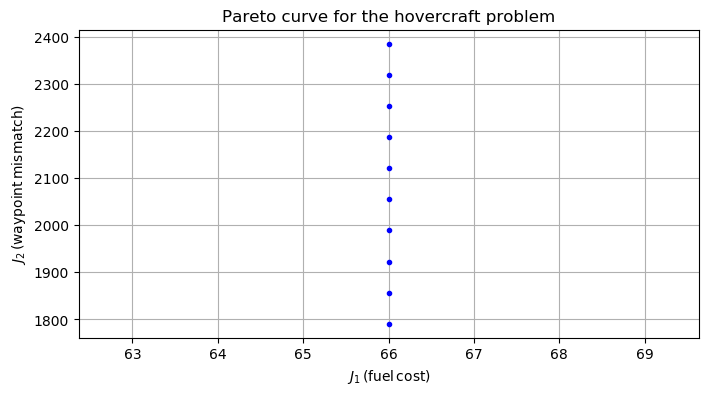

In [18]:
using PyPlot
figure(figsize=(8,4))
plot( J1, J2, "b." )
xlabel(L"J_1\, (\sf fuel\, cost)")
ylabel(L"J_2\, (\sf waypoint\, mismatch)");
title("Pareto curve for the hovercraft problem")
grid()

## 4. Results and discussion ##

At first our optimal diets recommended a lot of beer for children and a non-negligible amount of infant formula for adults. Since these foods are clearly not age-appropriate, we added constraints limiting alcohol content and requiring that adults not cosume baby food. We also incorporated other logical constraints... In attempting to impose variety on the diets, we noticed that if the upper limits on fruit are too low, an appropriate diet becomes infeasible. Since many disadvantaged areas in America (and other parts of the world) have limited access to fresh, good-quality food, it's possible (indeed probable) that health disparities are enforced by the existence of the aforementioned food deserts.

When we constructed the Pareto curve, we found that your time had to be (really valuable? not very valuable) for time to be an important concern in choosing the places to shop and the order in which they shopped... 

How scalable is the traveling salesman part of the simulation? How many stores must be included before we break the model?

One simulation we would like to consider is applying this principle to restaurant selection. Suppose you are in a new city for a few weeks. How can you select a variety of restaurants to minimize time spent in transit as well as ensuring you have a correct diet?

Which breaks the model more quickly: more foods or more locations?


## 5. Conclusion ##

Three way pareto curve between deliciousness, travel time, and cost

Does exercise reduce the cost of our diet?

### TODO:
   - Add taste factor?
   - Finish pareto curve
   - Map showing optimal path
   - Conclusion section
   - Tweaking 
   - ISSUE: The travel cost stays exactly the same when I vary lambda. Can we mess with the model (number of stores, etc) such that I can get different travel costs as I vary lambda?

Annie
   - Fix bounds error after changing # of ages from 2 to 3 
   - Start on discussion section
   - Interactivity
   - Pareto curve (3-way)?
   
Harish
   - Add assumptions
   - Fix max constraint and spreadsheet
   - Fix upper limit data
   - Update print for S1, S2
   - Update optimal path for S3
   - Clean up code
   
Idea?
   - Scenario 4: taste factor